In [ ]:
#data preprocessing
import pandas as pd
#math operations
import numpy as np
#machine learning
 
from sklearn.preprocessing import StandardScaler
#hyperparameter optimization
from sklearn.model_selection import GridSearchCV
#support vector machine model
from keras import regularizers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Activation
            
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import random
import tensorflow as tf

In [ ]:
Cells=np.load("/content/drive/My Drive/Colab Notebooks/Cells64.npy")
labels=np.load("/content/drive/My Drive/Colab Notebooks/labels64.npy")

In [ ]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [ ]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [ ]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [ ]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [ ]:
#Doing One hot encoding as classifier has multiple classes
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

# datagen.fit(x_train)

In [ ]:
# from keras.callbacks import EarlyStopping
# earlystop= EarlyStopping(monitor='val_acc', patience=3)
# epochs = 20 # 
# batch_size = 256

In [ ]:
# initialzie the model
model = Sequential()
inputShape = (64, 64, 3)
 
model.add(Conv2D(32, kernel_size=(3,3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(MaxPooling2D(pool_size=2))
 
model.add(Flatten())
model.add(Dense(4000))
model.add(Dense(2))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4000)              32772000  
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [ ]:
# Compiling model
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics=['accuracy'])

In [ ]:
# Fit the model
history = model.fit(x = x_train, y = y_train,
                    epochs = 20, validation_data = (x_test,y_test),
                    verbose = 1)

Epoch 1/20
776/776 [==============================] - 25s 33ms/step - loss: 0.8379 - accuracy: 0.7814 - val_loss: 0.3398 - val_accuracy: 0.8853
Epoch 2/20
776/776 [==============================] - 25s 33ms/step - loss: 0.3765 - accuracy: 0.8878 - val_loss: 0.3164 - val_accuracy: 0.8897
Epoch 3/20
776/776 [==============================] - 25s 32ms/step - loss: 0.3425 - accuracy: 0.8986 - val_loss: 0.4081 - val_accuracy: 0.8483
Epoch 4/20
507/776 [==================>...........] - ETA: 8s - loss: 0.3342 - accuracy: 0.9021

KeyboardInterrupt: ignored

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/Shallownet64/PKLShallowNet64.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [ ]:
# del model

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

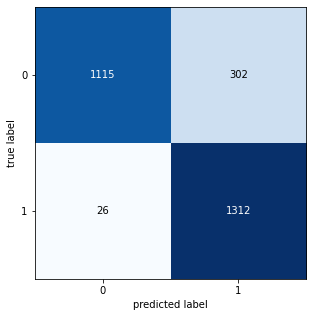

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()